<a href="https://colab.research.google.com/github/hevjinyarar/zoohackathon/blob/master/zoohackathon_Hevjin_ExploreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Get Resources and Data

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import time
import torch
import glob
import pandas as pd
import torchvision
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
import os,shutil

In [0]:
# get data from drive
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/My Drive/zoohackathon/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_folder_names = ["0000000062_0000000000", "0000000067_0000000027",  "0000000067_0000000050",
"0000000067_0000000005",  "0000000067_0000000028",  "0000000067_0000000052",
"0000000067_0000000012",  "0000000067_0000000029",  "0000000067_0000000055",
"0000000067_0000000014",  "0000000067_0000000031",  "0000000067_0000000058",
"0000000067_0000000015",  "0000000067_0000000032",  "0000000067_0000000059",
"0000000067_0000000019",  "0000000067_0000000040",  "0000000364_0000000000",
"0000000067_0000000024",  "0000000067_0000000041",  "0000000367_0000000000",
"0000000067_0000000025",  "0000000067_0000000045",
"0000000067_0000000026",  "0000000067_0000000046"]

test_folder_names = ["0000000010_0000000000",  "0000000351_0000000000",  "0000000363_0000000000",
"0000000054_0000000000",  "0000000354_0000000000",
"0000000056_0000000000",  "0000000359_0000000000"]

#read labels
#!ls  "/content/drive/My Drive/zoohackathon/zoohackathon_train_annot"
label_folder_names = ["0000000062_0000000000.csv",  "0000000067_0000000027.csv",  "0000000067_0000000050.csv",
"0000000067_0000000005.csv",  "0000000067_0000000028.csv",  "0000000067_0000000052.csv",
"0000000067_0000000012.csv",  "0000000067_0000000029.csv",  "0000000067_0000000055.csv",
"0000000067_0000000014.csv",  "0000000067_0000000031.csv", "0000000067_0000000058.csv",
"0000000067_0000000015.csv",  "0000000067_0000000032.csv",  "0000000067_0000000059.csv",
"0000000067_0000000019.csv",  "0000000067_0000000040.csv",  "0000000364_0000000000.csv",
"0000000067_0000000024.csv",  "0000000067_0000000041.csv",  "0000000367_0000000000.csv",
"0000000067_0000000025.csv",  "0000000067_0000000045.csv",
"0000000067_0000000026.csv", "0000000067_0000000046.csv"]

In [0]:
#as first example look at 1 folder in train/test data
#!ls  "/content/drive/My Drive/zoohackathon/zoohackathon_train"
folderN_train = 8
folderN_test = 0
images_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[folderN_train]+  '/*.jpg')
images_test = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_test/" + test_folder_names[folderN_test]+  '/*.jpg')

#### First Look at Data

[[141 140 138 ... 152 143 145]
 [146 143 135 ... 149 144 144]
 [141 134 147 ... 144 144 144]
 ...
 [153 153 155 ...  90  90  90]
 [154 154 155 ...  90  90  90]
 [156 156 156 ...  91  91  90]] 181


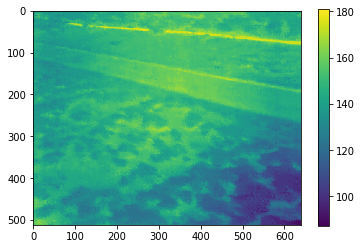

In [0]:
#first image, yay!
first_image = Image.open(images_train[0])
plt.imshow(first_image); plt.colorbar()
first_image_array = np.array(first_image)
print(first_image_array, first_image_array.max())

We have 25 training data folders (25 csv files) and 7 test data folders.

In [0]:
len(train_folder_names), len(label_folder_names), len(test_folder_names)

(25, 25, 7)

Let's see some images!

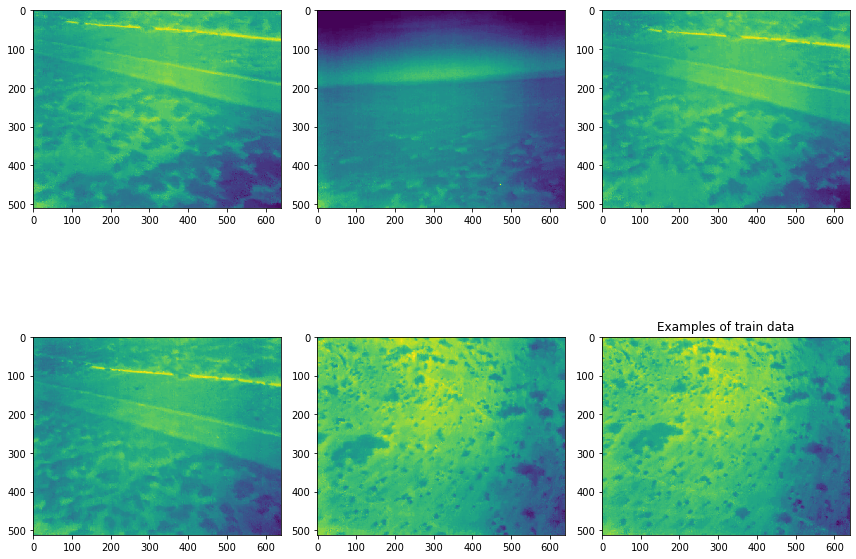

In [0]:
# train data from same folder
f, axs = plt.subplots(2, 3, figsize=(12, 10))

for i in range(6):
    image = Image.open(images_train[i])
    axs[i // 3][i % 3].imshow(image )
plt.title('Examples of train data')
plt.tight_layout()
plt.show()

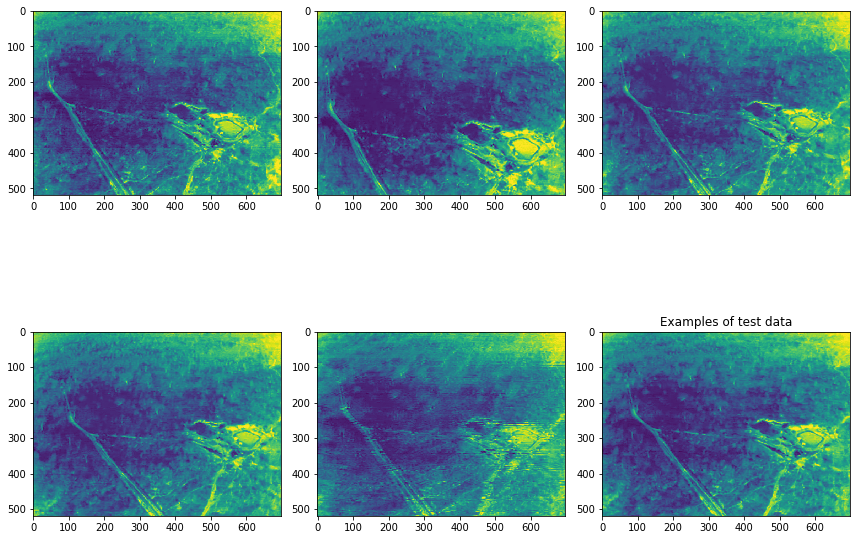

In [0]:
# test data from same folder
f, axs = plt.subplots(2, 3, figsize=(12, 10))

for i in range(6):
    image = Image.open(images_test[i])
    axs[i // 3][i % 3].imshow(image )
plt.title('Examples of test data')
plt.tight_layout()
plt.show()

Histograms of species per folder (change folder number to see a specific one you want) and all training images.

In [0]:
#!ls  "/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/"
forlderN_max = 24
folderN = 0 #max 24
labels_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/" + label_folder_names[folderN])

      frame_number  object_id    x    y  ...  class  species  occlusion  noise
0                2          1  268  231  ...      0       -1          0      0
1                2          2  300  215  ...      0       -1          0      0
2                2          3  293  211  ...      0       -1          0      0
3                2          4  322  227  ...      0       -1          0      0
4                2          5  343  243  ...      0       -1          0      0
...            ...        ...  ...  ...  ...    ...      ...        ...    ...
5143           447          9  339  407  ...      0       -1          0      0
5144           447         10  353  416  ...      0       -1          0      0
5145           447         11  363  426  ...      0       -1          0      0
5146           447         12  327  349  ...      0       -1          0      0
5147           447         13  363  399  ...      0       -1          0      0

[5148 rows x 10 columns] [[  2   1 268 ...  -1   0 

(array([   0.,    0.,    0.,    0.,    0., 5148.,    0.,    0.,    0.,
           0.]),
 array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5]),
 <a list of 10 Patch objects>)

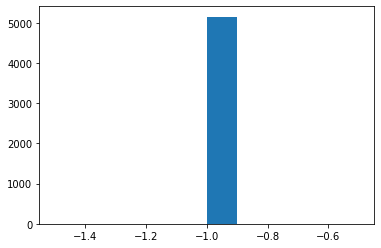

In [0]:
# labels: <frame_number>, <object_id>, <x>, <y>, <w>, <h>, <class>, <species>, <occlusion>, <noise>
label_list = ['frame_number', 'object_id', 'x','y','w','h','class','species','occlusion','noise']
data = pd.read_csv(labels_train[0],names = label_list)
labels = data.to_numpy()
print(data, labels)
print(label_folder_names[folderN])
plt.hist(labels[:,7]) #hist of species in this folder 

[-1  0  1  3]


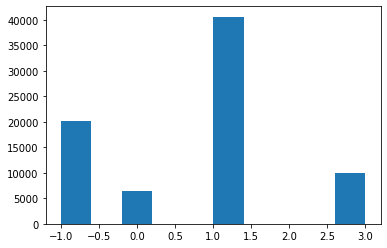

In [0]:
#hist of all species
species = []
for i in range(24):
  labels_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/" + label_folder_names[i])
  data = pd.read_csv(labels_train[0],names = label_list)
  labels = data.to_numpy()
  species.append(labels[:,7])
species = np.concatenate(np.asarray(species))  
print(np.unique(species))
plt.hist(species);plt.show()


Number of images in each train/test data folder

In [0]:
train_images_number,test_images_number = [],[]
for i in range(24):
  images_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[i]+  '/*.jpg')
  train_images_number.append(len(images_train))
for i in range(7):
  images_test = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_test/" + test_folder_names[i]+  '/*.jpg')
  test_images_number.append(len(images_test))
print(train_images_number)
print(test_images_number)  

[449, 1004, 1044, 1000, 941, 876, 950, 956, 896, 960, 963, 968, 936, 971, 936, 970, 1003, 7957, 950, 975, 5448, 959, 912, 966]
[354, 142, 2795, 309, 1752, 163, 235]


Example of an image from each train folder.

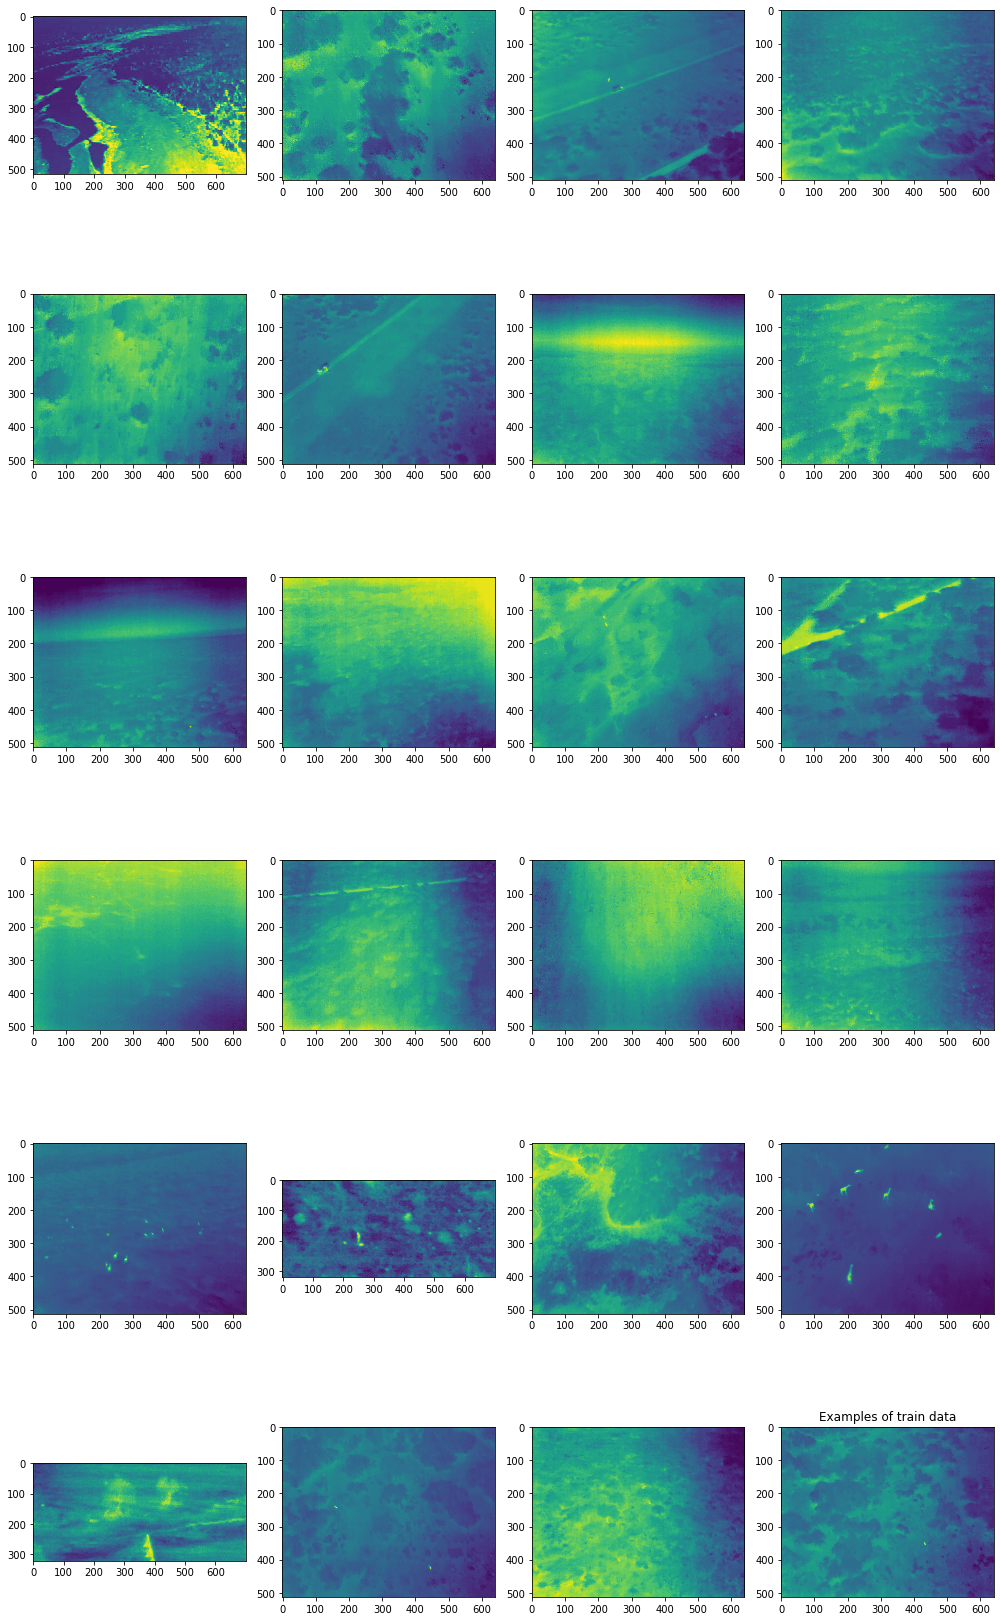

CPU times: user 5.26 s, sys: 147 ms, total: 5.41 s
Wall time: 18.2 s


In [0]:
%%time
f, axs = plt.subplots(6, 4, figsize=(14, 24))
for i in range(24):
  images_train= glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[i]+  '/*.jpg')
  for j in range(len(images_train)):
    image = Image.open(images_train[j])
    image_array = np.array(image)
    if j == 1:
      break
  axs[i // 4][i % 4].imshow(image_array )
plt.title('Examples of train data')
plt.tight_layout()
plt.show()

In [0]:
#occluded images

In [0]:
#noisy images

In [0]:
#bad resolution images 

#### Find all images that have animals in them a.k.a. class = 0 AND species != -1

In [0]:
#give me the folder name in such case
animal_images = []
print("#Animals   Folder Name              #Images with Animals       #All Folder Images")
for i in range(24):

  ######## 
  #folder images
  images_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[i]+  '/*.jpg')
  #labels of the folder
  labels_train_folder = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/" + label_folder_names[i])[0]
  #print(train_folder_names[i])#folder name
  #print(labels_train_folder)# label file name
  data = pd.read_csv(labels_train_folder,names = label_list); labels = data.to_numpy();#labels
  #print(len(data),len(images_train)) 

  ########
  #mask 
  mask1 = pd.Series.multiply((data['class'] == 0),(data['species'] != -1))
  if sum(mask1) > 0:
    #which folders? #how many images? #how many images in total in that folder?
    print(sum(mask1),'    ', train_folder_names[i],'    ',len(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True))), '                     ',len(images_train))
    animal_images.append(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True)).astype('int32').tolist())

    
animal_folders = ["0000000067_0000000040","0000000067_0000000041","0000000367_0000000000"]

animal_images[2][1] = 1 #for some reason this gets messed up so we correct

animal_images_names = []
for i,folder in enumerate(animal_images):
  images_in_this_folder = []
  for framenumber in folder:
    if framenumber < 0:
      print("error")
      break
    #each image name has this format: foldername_000..00framenumber # number of zeros complete "00framenumber" to 10 digits
    nzeros = 10 - len(str(int(framenumber)))
    frontZeros = '0'
    frontZeros *= nzeros
    images_in_this_folder.append(animal_folders[i] + '_' + frontZeros + str(framenumber) + '.jpg')
  animal_images_names.append(images_in_this_folder)

#Animals   Folder Name              #Images with Animals       #All Folder Images
3998      0000000067_0000000040      591                       1003
5981      0000000067_0000000041      665                       975
40601      0000000367_0000000000      5094                       5448


In [0]:
#Double Check

#### Find all images that have humans in them a.k.a. class = 1 AND species = 0

In [0]:
#give me the folder name in such case
human_images = []
print("#Humans   Folder Name              #Images with Humans       #All Folder Images")
for i in range(24):

  ######## 
  #folder images
  images_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[i]+  '/*.jpg')
  #labels of the folder
  labels_train_folder = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/" + label_folder_names[i])[0]
  #print(train_folder_names[i])#folder name
  #print(labels_train_folder)# label file name
  data = pd.read_csv(labels_train_folder,names = label_list); labels = data.to_numpy();#labels
  #print(len(data),len(images_train)) 

  ########
  #mask 
  mask1 = pd.Series.multiply((data['class'] == 1),(data['species'] == 0))
  if sum(mask1) > 0:
    #which folders? #how many images? #how many images in total in that folder?
    print(sum(mask1),'    ', train_folder_names[i],'    ',len(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True))), '                     ',len(images_train))
    human_images.append(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True)).astype('int32').tolist())
    
human_folders = ["0000000067_0000000050","0000000067_0000000052","0000000067_0000000059","0000000364_0000000000"]

human_images[0][1] = 1 #for some reason this gets messed up so we correct
human_images[1][1] = 1 #for some reason this gets messed up so we correct
human_images[2][1] = 1 #for some reason this gets messed up so we correct

human_images_names = []
for i,folder in enumerate(human_images):
  images_in_this_folder = []
  for framenumber in folder:  
    if framenumber < 0:
      print("error")
      break
    #each image name has this format: foldername_000..00framenumber # number of zeros complete "00framenumber" to 10 digits
    nzeros = 10 - len(str(int(framenumber)))
    frontZeros = '0'
    frontZeros *= nzeros
    images_in_this_folder.append(human_folders[i] + '_' + frontZeros + str(framenumber) + '.jpg')
  human_images_names.append(images_in_this_folder)

#Humans   Folder Name              #Images with Humans       #All Folder Images
1377      0000000067_0000000050      914                       1044
331      0000000067_0000000052      331                       876
78      0000000067_0000000059      468                       936
4655      0000000364_0000000000      4655                       7957


#### Find all images that have elephants in them a.k.a. class = 0 AND species = 1

In [0]:
#give me the folder name in such case
elephant_images = []
print("#Elephants   Folder Name              #Images with Elephants       #All Folder Images")
for i in range(24):

  ######## 
  #folder images
  images_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[i]+  '/*.jpg')
  #labels of the folder
  labels_train_folder = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/" + label_folder_names[i])[0]
  #print(train_folder_names[i])#folder name
  #print(labels_train_folder)# label file name
  data = pd.read_csv(labels_train_folder,names = label_list); labels = data.to_numpy();#labels
  #print(len(data),len(images_train)) 

  ########
  #mask 
  mask1 = pd.Series.multiply((data['class'] == 0),(data['species'] == 1))
  if sum(mask1) > 0:
    #which folders? #how many images? #how many images in total in that folder?
    print(sum(mask1),'    ', train_folder_names[i],'    ',len(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True))), '                     ',len(images_train))
    elephant_images.append(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True)).astype('int32').tolist())

    
elephant_folders = ["0000000367_0000000000"]
elephant_images[0][1] = 1 #for some reason this gets messed up so we correct

elephant_images_names = []
for i,folder in enumerate(elephant_images):
  images_in_this_folder = []
  for framenumber in folder:
    if framenumber < 0:
      print(i,"error")
      break
    #each image name has this format: foldername_000..00framenumber # number of zeros complete "00framenumber" to 10 digits
    nzeros = 10 - len(str(int(framenumber)))
    frontZeros = '0'
    frontZeros *= nzeros
    images_in_this_folder.append(elephant_folders[i] + '_' + frontZeros + str(framenumber) + '.jpg')
  elephant_images_names.append(images_in_this_folder)

#Elephants   Folder Name              #Images with Elephants       #All Folder Images
40601      0000000367_0000000000      5094                       5448


#### Find all images that have giraffes in them a.k.a. class = 0 AND species = 3

In [0]:
#give me the folder name in such case
giraffe_images = []
print("#Giraffes   Folder Name              #Images with Giraffes       #All Folder Images")
for i in range(24):

  ######## 
  #folder images
  images_train = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train/" + train_folder_names[i]+  '/*.jpg')
  #labels of the folder
  labels_train_folder = glob.glob("/content/drive/My Drive/zoohackathon/zoohackathon_train_annot/" + label_folder_names[i])[0]
  #print(train_folder_names[i])#folder name
  #print(labels_train_folder)# label file name
  data = pd.read_csv(labels_train_folder,names = label_list); labels = data.to_numpy();#labels
  #print(len(data),len(images_train)) 

  ########
  #mask 
  mask1 = pd.Series.multiply((data['class'] == 0),(data['species'] == 3))
  if sum(mask1) > 0:
    #which folders? #how many images? #how many images in total in that folder?
    print(sum(mask1),'    ', train_folder_names[i],'    ',len(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True))), '                     ',len(images_train))
    giraffe_images.append(pd.Series.unique(data['frame_number'].mask(lambda mask1: mask1 == True)).astype('int32').tolist())

giraffe_folders = ["0000000067_0000000040","0000000067_0000000041"]


giraffe_images_names = []
for i,folder in enumerate(giraffe_images):
  images_in_this_folder = []
  for framenumber in folder:
    if framenumber < 0:
      print(i,"error")
      break
    #each image name has this format: foldername_000..00framenumber # number of zeros complete "00framenumber" to 10 digits
    nzeros = 10 - len(str(int(framenumber)))
    frontZeros = '0'
    frontZeros *= nzeros
    images_in_this_folder.append(giraffe_folders[i] + '_' + frontZeros + str(framenumber) + '.jpg')
  giraffe_images_names.append(images_in_this_folder)

#Giraffes   Folder Name              #Images with Giraffes       #All Folder Images
3998      0000000067_0000000040      591                       1003
5981      0000000067_0000000041      665                       975


Do the numbers -#Images with Giraffes/Elephants- seem familiar? That's because 

- in folder 0000000067_0000000040 all the images that have animals in them have giraffes. 
- in folder 0000000067_0000000041 all the images that have animals in them have giraffes. 
-in folder 0000000367_0000000000 all the images that have animals in them have elephants. 


--> DOUBLE CHECK THIS


#### Create new folders with animals,humans,elephants and giraffes, respectively

This is good, now we can simply copy these images into separate folders for our study.
- "human_images_names" are the images in the folders "human_folders"
- "animal_images_names" are the images in the folders "animal_folders"
- "elephant_images_names" are the images in the folders "elephant_folders"
- "giraffe_images_names" are the images in the folders "giraffe_folders"

In [0]:
"""
#RUN THIS ONLY ONCE!
!cd "/content/drive/My Drive/zoohackathon/" && mkdir "zoohackathon_train_new"
!cd "/content/drive/My Drive/zoohackathon/zoohackathon_train_new" && mkdir "humans"
!cd "/content/drive/My Drive/zoohackathon/zoohackathon_train_new" && mkdir "animals"
!cd "/content/drive/My Drive/zoohackathon/zoohackathon_train_new" && mkdir "elephants"
!cd "/content/drive/My Drive/zoohackathon/zoohackathon_train_new" && mkdir "giraffes"
""";

Let's copy all the images in the corresponding new folders. This takes some time!

In [0]:
"""
#RUN THIS ONLY ONCE!
%%time
#animals
target_directory = "/content/drive/My Drive/zoohackathon/zoohackathon_train_new/animals"
for i,directory in enumerate(animal_folders):
  images_animals = animal_images_names[i]
  for j,jpgfile in enumerate(images_animals):
    shutil.copy("/content/drive/My Drive/zoohackathon/zoohackathon_train/" +directory +'/'+ jpgfile, target_directory)
""";

In [0]:
"""
%%time
#RUN THIS ONLY ONCE!
#humans
target_directory = "/content/drive/My Drive/zoohackathon/zoohackathon_train_new/humans"
for i,directory in enumerate(human_folders):
  images_humans = human_images_names[i]
  for j,jpgfile in enumerate(images_humans):
    shutil.copy("/content/drive/My Drive/zoohackathon/zoohackathon_train/" +directory +'/'+ jpgfile, target_directory)
""";

CPU times: user 3.86 s, sys: 4.07 s, total: 7.94 s
Wall time: 30min 56s


In [0]:
"""
%%time
#RUN THIS ONLY ONCE!
#elephants
target_directory = "/content/drive/My Drive/zoohackathon/zoohackathon_train_new/elephants"
for i,directory in enumerate(elephant_folders):
  images_elephants = elephant_images_names[i]
  for j,jpgfile in enumerate(images_elephants):
    shutil.copy("/content/drive/My Drive/zoohackathon/zoohackathon_train/" +directory +'/'+ jpgfile, target_directory)
""";

CPU times: user 3.27 s, sys: 4.1 s, total: 7.37 s
Wall time: 1min 39s


In [0]:
"""
%%time
#RUN THIS ONLY ONCE!
#giraffes
target_directory = "/content/drive/My Drive/zoohackathon/zoohackathon_train_new/giraffes"
for i,directory in enumerate(giraffe_folders):  
  images_giraffes = giraffe_images_names[i]
  for j,jpgfile in enumerate(images_giraffes):
    shutil.copy("/content/drive/My Drive/zoohackathon/zoohackathon_train/" +directory +'/'+ jpgfile, target_directory)
""";

CPU times: user 657 ms, sys: 851 ms, total: 1.51 s
Wall time: 22 s


Now we are ready to do some deep learning!